<a href="https://colab.research.google.com/github/ysrkd422/2020-2-AI/blob/master/code/07_reg_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

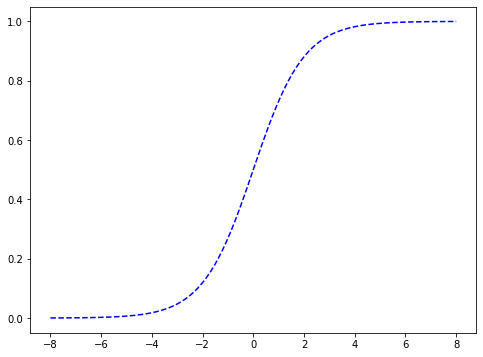

In [12]:
import numpy as np
import matplotlib.pylab as plt

def sigm_func(x): # sigmoid 함수
    return 1 / (1 + np.exp(-x))

# 시그모이드 함수 그리기
plt.figure(figsize=(8, 6)) 
x = np.linspace(-8, 8, 100)
plt.plot(x, sigm_func(x), 'b--')

In [13]:
np.e

2.718281828459045

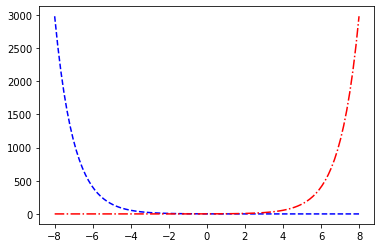

In [14]:
plt.figure(figsize=(6, 4)) 
x = np.linspace(-8, 8, 100)
plt.plot(x, np.exp(-x), 'b--')
_ = plt.plot(x, np.exp(x), 'r-.')

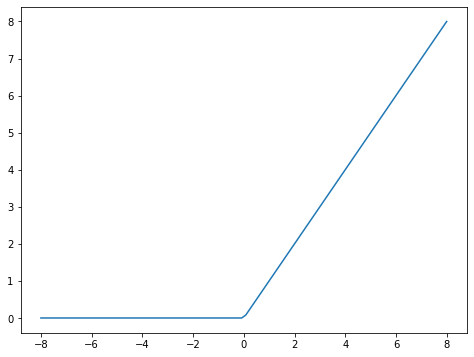

In [15]:
import numpy as np
import matplotlib.pylab as plt

def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x) 
    #return (x>0)*x # same

# ReLU 함수 그리기
plt.figure(figsize=(8, 6)) 
x = np.linspace(-8, 8, 100)
plt.plot(x, relu_func(x))

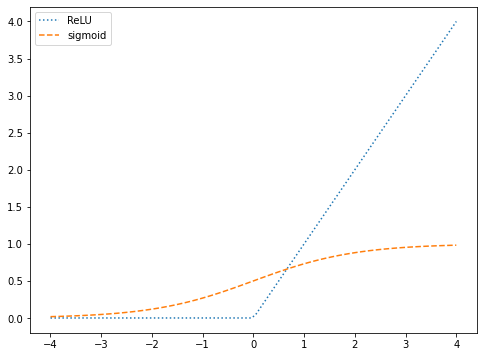

In [16]:
import numpy as np
import matplotlib.pylab as plt

def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x) 
    #return (x>0)*x # same

def sigm_func(x): # sigmoid 함수
    return 1 / (1 + np.exp(-x))

# 그래프 그리기
plt.figure(figsize=(8, 6)) 
x = np.linspace(-4, 4, 100)
y = np.linspace(-0.2, 2, 100)

plt.plot(x, relu_func(x), linestyle=':', label="ReLU")
plt.plot(x, sigm_func(x), linestyle='--', label="sigmoid")
plt.legend(loc='upper left')

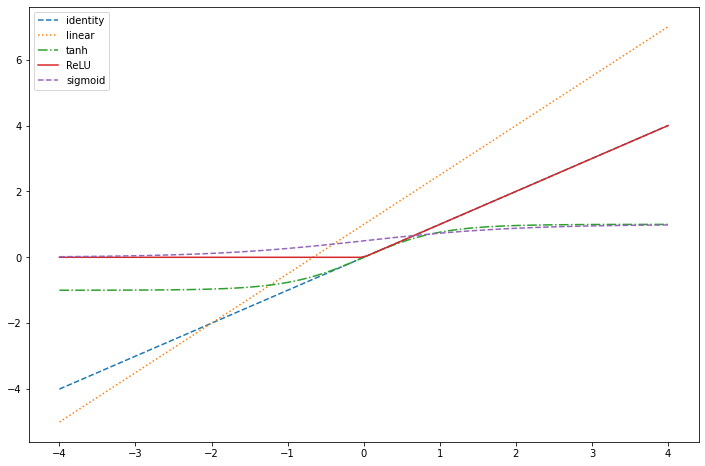

In [17]:
import numpy as np
import matplotlib.pylab as plt
 
def identity_func(x): # 항등함수
    return x
  
def linear_func(x): # 1차함수
    return 1.5 * x + 1 # a기울기(1.5), Y절편b(1) 조정가능

def tanh_func(x): # TanH 함수
    return np.tanh(x)

def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x) 
    #return (x>0)*x # same

def sigm_func(x): # sigmoid 함수
    return 1 / (1 + np.exp(-x))

# 그래프 그리기
plt.figure(figsize=(12, 8)) 
x = np.linspace(-4, 4, 100)

plt.plot(x, identity_func(x), linestyle='--', label="identity")
plt.plot(x, linear_func(x), linestyle=':', label="linear")
plt.plot(x, tanh_func(x), linestyle='-.', label="tanh")
plt.plot(x, relu_func(x), linestyle='-', label="ReLU")
plt.plot(x, sigm_func(x), linestyle='--', label="sigmoid")
plt.legend(loc='upper left')

In [18]:
import tensorflow as tf

# 1 문제와 정답 데이터 지정
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# 2 모델 구성(생성)
model = tf.keras.models.Sequential([
    #                   출력, 입력=(*, 1)           그대로 출력
    tf.keras.layers.Dense(1, input_shape=(1, ), activation='linear')
    #Dense(1, input_dim=1)
])

In [19]:
# 3 학습에 필요한 최적화 방법과 손실 함수 등 지정
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력 정보를 지정
# Mean Absolute Error, Mean Squared Error
model.compile(optimizer='SGD', loss='mse',
              metrics=['mae', 'mse'])

In [20]:
# 모델을 표시(시각화)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 4 생성된 모델로 훈련 데이터 학습
# 훈련과정 정보를 history 객체에 저장 
history = model.fit(x_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 74.5359 - mae: 7.8812 - mse: 74.5359
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 51.7652 - mae: 6.5414 - mse: 51.7652
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 35.9648 - mae: 5.4254 - mse: 35.9648
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 25.0010 - mae: 4.4959 - mse: 25.0010
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 17.3931 - mae: 3.7217 - mse: 17.3931
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 12.1139 - mae: 3.0768 - mse: 12.1139
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 8.4505 - mae: 2.5397 - mse: 8.4505
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 5.9083 - mae: 2.0924 - mse: 5.9083
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 4.1440 - mae: 1.7198 - mse: 4.1440
Epoch 10/500
1/1 [================

In [22]:
# 5 테스트 데이터로 성능 평가
x_test = [1.2, 2.3, 3.4, 4.5]
y_test = [2.4, 4.6, 6.8, 9.0]

print('손실:', model.evaluate(x_test, y_test))

1/1 [==============================] - 0s 2ms/step - loss: 0.0081 - mae: 0.0803 - mse: 0.0081
손실: [0.00810207612812519, 0.08029341697692871, 0.00810207612812519]


In [23]:
# x = [3.5, 5, 5.5, 6]의 예측 
print(model.predict([3.5, 5, 5.5, 6]))

pred = model.predict([3.5, 5, 5.5, 6])
 
print(pred.flatten())
print(pred.squeeze())

[[ 6.9591327]
 [ 9.849641 ]
 [10.813144 ]
 [11.776648 ]]
[ 6.9591327  9.849641  10.813144  11.776648 ]
[ 6.9591327  9.849641  10.813144  11.776648 ]


In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'mse'])

Text(0, 0.5, 'loss')

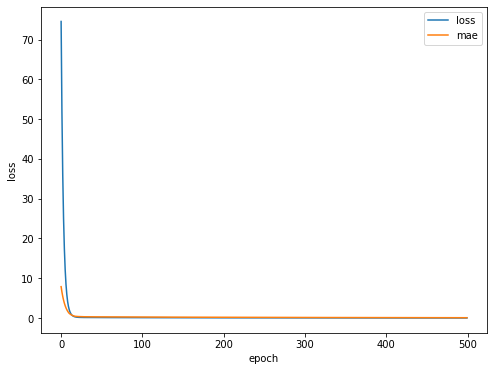

In [25]:
import matplotlib.pylab as plt

# 그래프 그리기
fig = plt.figure(figsize=(8, 6)) 

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
#plt.plot(history.history['mse'], label='mse')

plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'y')

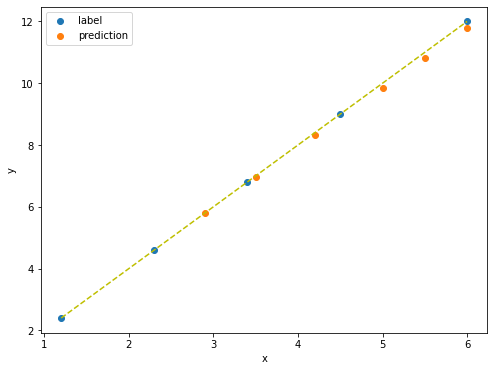

In [26]:
import matplotlib.pylab as plt

x_test = [1.2, 2.3, 3.4, 4.5, 6.0]
y_test = [2.4, 4.6, 6.8, 9.0, 12.0]

# 그래프 그리기
fig = plt.figure(figsize=(8, 6)) 

plt.scatter(x_test, y_test, label='label')
plt.plot(x_test, y_test, 'y--')

x = [2.9, 3.5, 4.2, 5, 5.5, 6]
pred = model.predict(x)
plt.scatter(x, pred.flatten(), label='prediction')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]


model = Sequential([
       
    Dense(1, input_shape=(1, ), activation='linear')
    #Dense(1, input_dim=1)
])

model.compile(optimizer='SGD', loss='mse', metrics=['mae', 'mse'])
model.summary()
model.fit(x_train, y_train, epochs=1000)

x_test = [1.2, 2.3, 3.4, 4.5]
y_test = [2.4, 4.6, 6.8, 9.0]
print('정확도:', model.evaluate(x_test, y_test))

print(model.predict([3.5, 5, 5.5, 6]))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 3ms/step - loss: 21.1108 - mae: 4.1943 - mse: 21.1108
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 14.6615 - mae: 3.4813 - mse: 14.6615
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 10.1863 - mae: 2.8874 - mse: 10.1863
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 7.0810 - mae: 2.3927 - mse: 7.0810
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.9263 - mae: 1.9806 - mse: 4.9263
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.4310 - mae: 1.6375 - mse: 3.4310
Epoch 

In [28]:
import tensorflow as tf
import numpy as np

#훈련과 테스트 데이터
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 3, 5, 7, 9]) #y = x * 2 + 1

#인공신경망 모델 사용
model = tf.keras.models.Sequential()

#은닉계층 하나 추가
model.add(tf.keras.layers.Dense(1, input_shape=(1, )))

#모델의 패라미터를 지정하고 모델 구조를 생성
#최적화 알고리즘 : 확률적 경사 하강법(SGD: Stochastic Gradient Descent)
#손실 함수(loss function): 평균제곱오차(MSE: Mean Square Error)
model.compile('SGD', 'mse')

#생성된 모델로 훈련 자료로 입력(x[:2])과 출력(y[:2])을 사용하여 학습
#키워드 매개변수 epoch(에퐄) : 훈련반복횟수
#키워드 매개변수 verbose: 학습진행사항 표시
model.fit(x[:3], y[:3], epochs=1000, verbose=0)

#테스트 자료의 결과를 출력
print('Targets(정답):', y[3:])

#학습된 모델로 테스트 자료로 결과를 예측(model.predict)하여 출력
print('Predictions(예측):', model.predict(x[3:]).flatten())



Targets(정답): [7 9]
Predictions(예측): [6.997794 8.996426]
